In [1]:
from numpy import *
import pandas as pd                       #data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
%matplotlib inline

In [2]:
train=pd.read_csv('titanic_train.csv')

In [3]:
train.info()
train.describe()
train.isnull()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

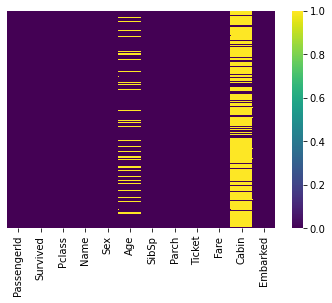

In [4]:
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

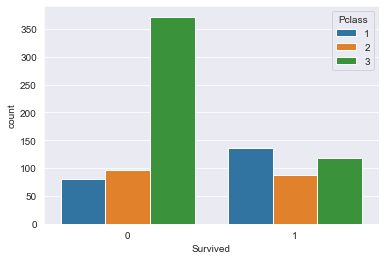

In [5]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Pclass',data=train)


<AxesSubplot:xlabel='Age'>

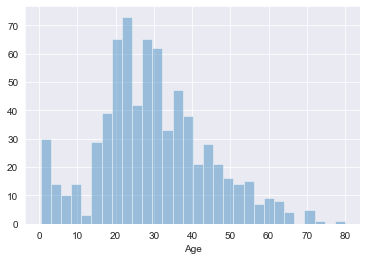

In [6]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<AxesSubplot:ylabel='Frequency'>

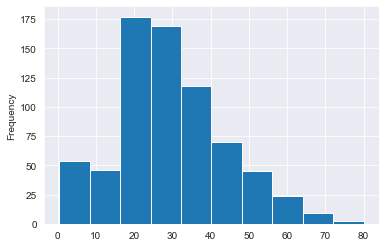

In [7]:
train['Age'].plot.hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

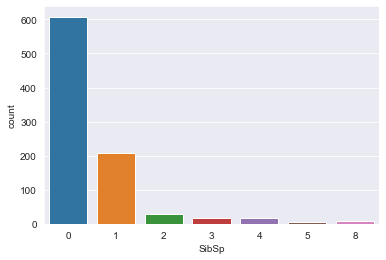

In [8]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

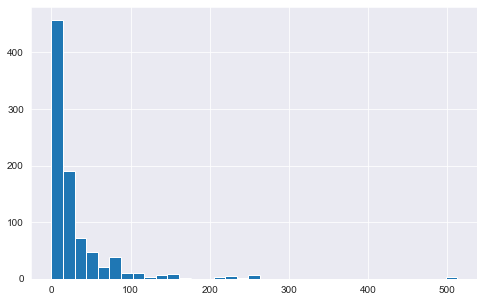

In [9]:
train['Fare'].hist(bins=35,figsize=(8,5))

In [10]:
import cufflinks as cf
cf.go_offline()
train['Age'].iplot(kind='bar',bins=100)

In [11]:
##fillin the vacancy
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):               #Data preprocessing and data cleaning
        if Pclass==1:
          return 36
        elif Pclass==2:
          return 28
        else:
          return 20
    else:
        return Age

<AxesSubplot:>

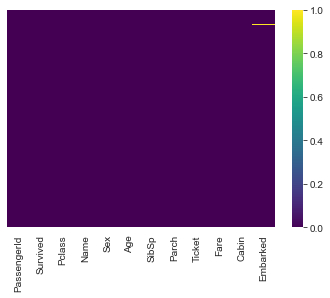

In [12]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)
train['Cabin'].fillna(mean(train['Age']),inplace=True)
sns.heatmap(train.isnull(),yticklabels=False,cmap='viridis')

In [13]:
train.drop('Cabin',axis=1,inplace=True)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [14]:
train.dropna(inplace=True)

In [15]:
sex=pd.get_dummies(train['Sex'],drop_first=True)


In [16]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


embrak=pd.get_dummies(train['Embark'],drop_first=True)


In [17]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)


In [18]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [19]:
train.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [20]:
train.drop(['male','Q','S'],axis=1,inplace=True)

In [21]:
train=pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
train.drop('PassengerId',axis=1,inplace=True)
train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,27.0,0,0,13.00,1,0,1
887,1,1,19.0,0,0,30.00,0,0,1
888,0,3,20.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


In [23]:
X=train.drop(['Survived'],axis=1)
y=train['Survived']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [34]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [35]:
z=LogisticRegression()

In [36]:
z.fit( X_train,y_train)

c:\users\hp\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [37]:
pre=z.predict(X_test)

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,pre))
print(confusion_matrix(y_test,pre))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86       184
           1       0.76      0.76      0.76       110

    accuracy                           0.82       294
   macro avg       0.81      0.81      0.81       294
weighted avg       0.82      0.82      0.82       294

[[157  27]
 [ 26  84]]
